##### `JEE Mains 2024 Colleges Opening/Closing Ranks EDA`

#### Steps in EDA
	1. Data Ingestion
	2. Perform basic data quality checks
		Missing Value treatment
	3. Perform descriptive statistics
	4. Data Visualization
		Univariate - Single column visualization
			categorical features - Countplot
			continuous features - histogram
		Bivariate - two columns
			continuous vs continuous -> scatterplot, regplot
			categorical vs con -> boxplot
			categorical vs categorical -> crosstab heatmap
		Multivariate - multiple columns
			correlation plot
			pairplot

In [39]:
# Step-1: Data Ingestion
import pandas as pd

df = pd.read_csv('nit-colleges-open-close-ranks-2025.csv')
df.head(1)

,Institute,Academic Program Short Name,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
0,Dr. B R Ambedkar National Institute of Technol...,Bio Technology,"Bio Technology (4 Years, Bachelor of Technology)",HS,OPEN,Gender-Neutral,58341,79511


In [2]:
# Step-2: Data Sanity - Check for duplicates, null
duplicates_count = df.duplicated().sum()
if duplicates_count > 0:
    print("Duplicates Exist.")
    df.drop_duplicates(keep='first').reset_index(drop=True)
    print('Duplicates Removed.')
else:
    print('Duplicates does not exist')

nulls = df.isna().sum()
nulls_cnt = nulls[nulls > 0].sum()
if nulls_cnt > 0:
    print("Nulls does not exist")
else:
    print('Nulls does not exist')

Duplicates does not exist
Nulls does not exist


In [3]:
cat = list(df.columns[df.dtypes == "object"])
cat

['Institute',
 'Academic Program Short Name',
 'Academic Program Name',
 'Quota',
 'Seat Type',
 'Gender']

In [4]:
con = list(df.columns[df.dtypes != "object"])
con

['Opening Rank', 'Closing Rank']

In [5]:
def replacer(df: pd.DataFrame):
    cat = list(df.columns[df.dtypes == "object"])    
    for col in df.columns:        
        if col in cat:
            mode = df[col].mode()[0]
            df[col] = df[col].fillna(mode)
        else:
            mean = df[col].mean()
            df[col] = df[col].fillna(mean)
    print("Missing values replaced")

replacer(df)

Missing values replaced


In [6]:
# Step-3: Perform descriptive statistics
cat, con

(['Institute',
  'Academic Program Short Name',
  'Academic Program Name',
  'Quota',
  'Seat Type',
  'Gender'],
 ['Opening Rank', 'Closing Rank'])

In [7]:
df[con].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Opening Rank,6255.0,15868.60,43168.03,2.0,1935.5,5770.0,15199.5,1002085.0
Closing Rank,6255.0,19322.52,53425.01,6.0,2253.5,6625.0,18051.5,1314967.0


In [8]:
df[cat].describe().T

,count,unique,top,freq
Institute,6255,32,"National Institute of Technology, Rourkela",402
Academic Program Short Name,6255,83,Computer Science and Engineering,741
Academic Program Name,6255,86,"Computer Science and Engineering (4 Years, Bac...",741
Quota,6255,5,OS,3312
Seat Type,6255,10,OPEN,1278
Gender,6255,2,Gender-Neutral,3769


Academic Program Short Name
Computer Science and Engineering    24
Data Science and Engineering        22
Civil Engineering                   20
Chemical Engineering                18
Bio Technology                      16
Name: count, dtype: int64


<Axes: xlabel='Academic Program Short Name'>

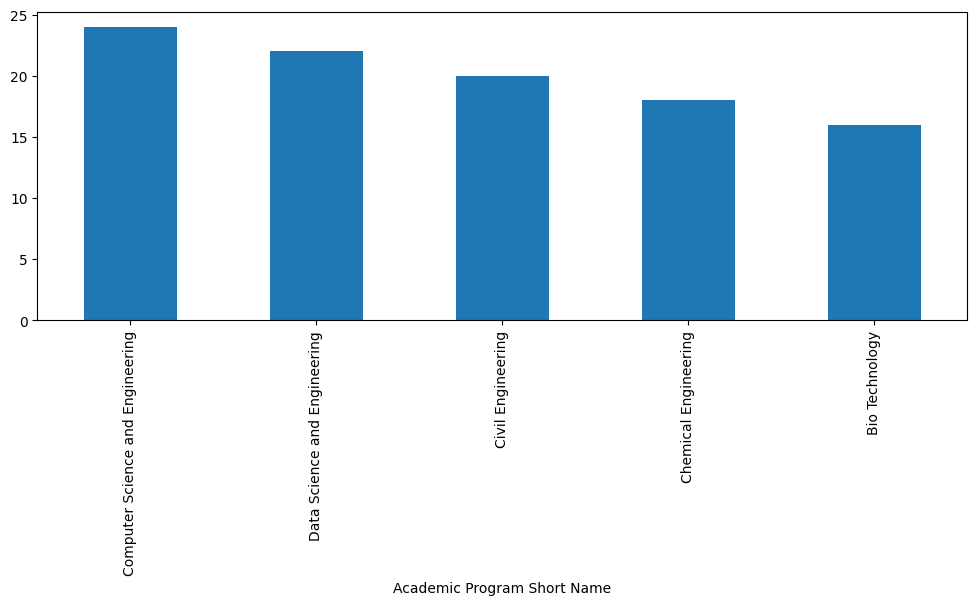

In [9]:
print(df['Academic Program Short Name'].head(100).value_counts())
df['Academic Program Short Name'].head(100).value_counts().plot(kind='bar', figsize=(12,4))

In [10]:
df['Seat Type'].value_counts()

Seat Type
OPEN             1278
OBC-NCL          1168
SC               1112
EWS               960
ST                951
OPEN (PwD)        383
OBC-NCL (PwD)     235
SC (PwD)           76
EWS (PwD)          68
ST (PwD)           24
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Gender-Neutral                           3769
Female-only (including Supernumerary)    2486
Name: count, dtype: int64

In [12]:
df['Institute'].head(3).value_counts()

Institute
Dr. B R Ambedkar National Institute of Technology, Jalandhar    3
Name: count, dtype: int64

In [13]:
# Step-4: Data Visualization
    # 1.Univariate - Single column visulization
    # 2.Bivariate - two column
    # 3.Multivariate - multiple columns
import matplotlib.pyplot as plt
import seaborn as sns

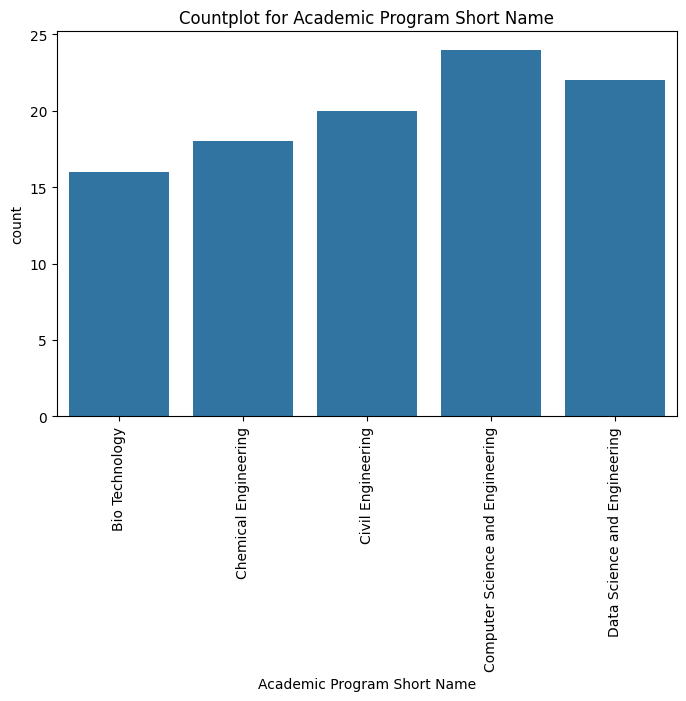

In [14]:
# Univariate analysis
    # 1. categorical features - Countplot
    # 2. continuous features - histogram

plt.figure(figsize=(8, 5)) # Set figure size (width, height)
sns.countplot(data=df.head(100), x="Academic Program Short Name") # Plot Graph
plt.title("Countplot for Academic Program Short Name") # Add Title
plt.xticks(rotation=90)
plt.show()

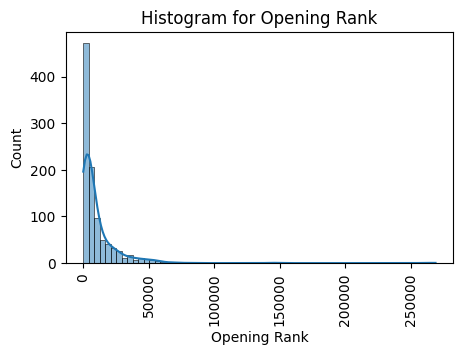

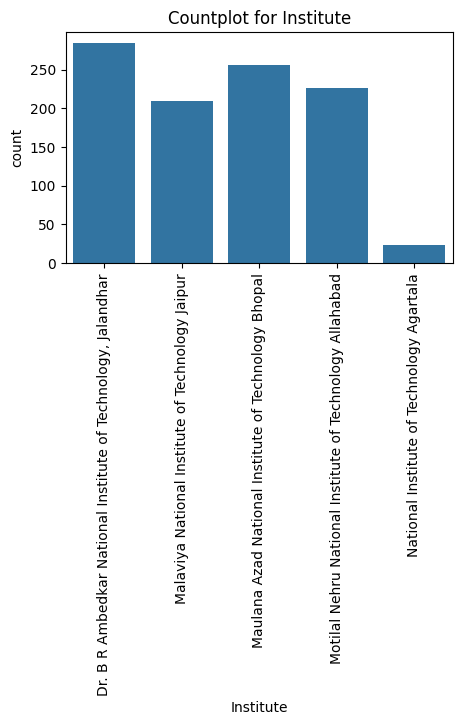

In [15]:
# Univariate Functions
def plot_count(df: pd.DataFrame, col: str):
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot for {col}')
    plt.xticks(rotation=90)
    plt.show()

def plot_histogram(df: pd.DataFrame, col: str):
    plt.figure(figsize=(5,3))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram for {col}')
    plt.xticks(rotation=90)
    plt.show()

for col in con:
    plot_histogram(df.head(1000), col)
    break # Just breaking for one column

for col in cat:
    plot_count(df.head(1000), col)
    break # Just breaking for one column

In [16]:
# Bivariate Analysis
    # Analyze two variables at a time
        # 1.continuous vs continuous -> scatterplot, regplot
        # 2.categorical vs continuous -> boxplot
        # 3.categorical vs categorical -> crosstab heatmap

# Bivariate functions
def plot_scatter(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(6,3))
    sns.regplot(data=df,x=x,y=y)
    plt.title(f"Scatterplot for {x} and {y}")
    plt.xticks(rotation=90)
    plt.show()

def plot_reg(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(6,3))
    sns.regplot(data=df, x=x, y=y, line_kws={"color":"Red"})
    plt.title(f"Regplot for {x} and {y}")
    plt.xticks(rotation=90)
    plt.show()

def plot_box(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df, x=x, y=y)
    plt.title(f"Boxplot for {x} and {y}")
    plt.xticks(rotation=90)
    plt.show()

con, cat

(['Opening Rank', 'Closing Rank'],
 ['Institute',
  'Academic Program Short Name',
  'Academic Program Name',
  'Quota',
  'Seat Type',
  'Gender'])

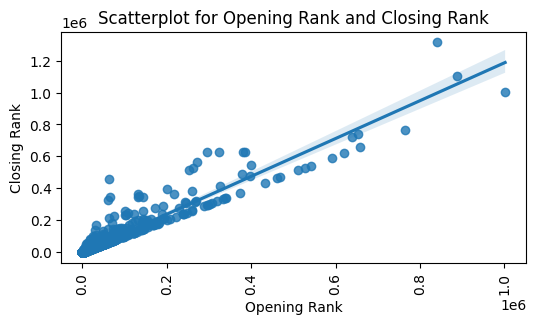

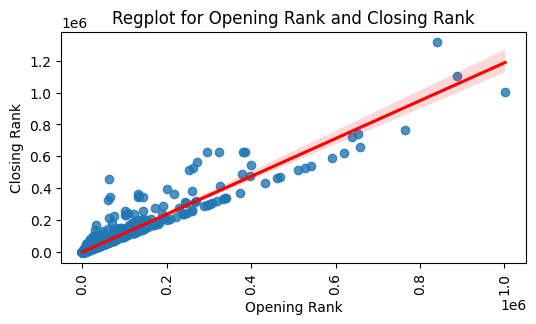

In [17]:
# 1.continuous vs continuous -> scatterplot, regplot
plot_scatter(df, 'Opening Rank', 'Closing Rank')
plot_reg(df, 'Opening Rank', 'Closing Rank')

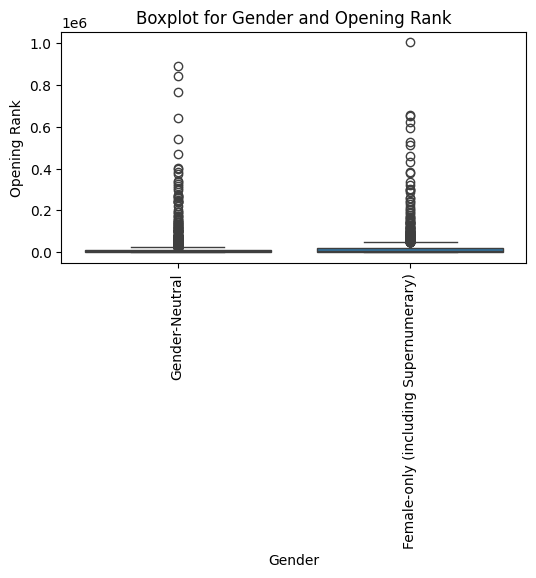

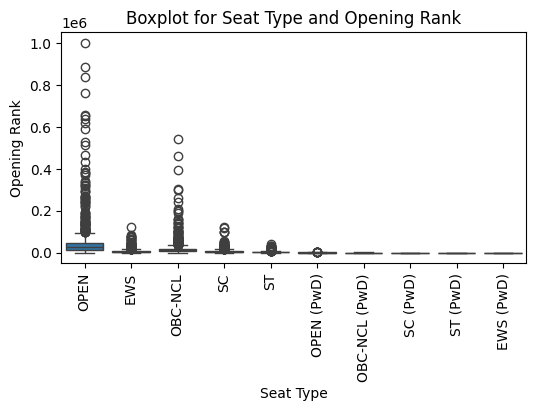

In [18]:
# 2. categorical vs continuous -> boxplot
plot_box(df, 'Gender', 'Opening Rank')
plot_box(df, 'Seat Type', 'Opening Rank')

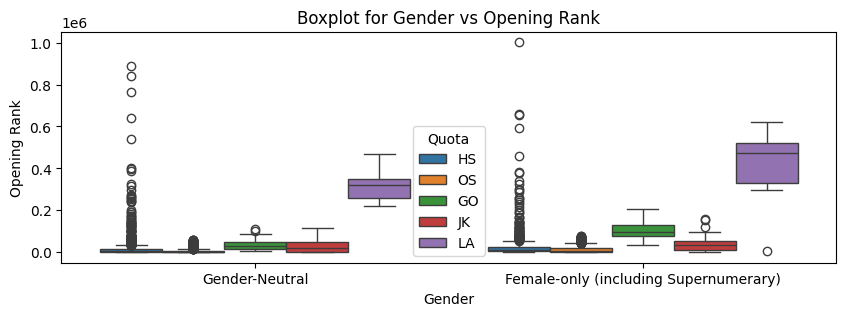

In [19]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df, x="Gender", y="Opening Rank", hue="Quota")
plt.title("Boxplot for Gender vs Opening Rank")
plt.show()

In [20]:
unique = df[cat].nunique()
unique

Institute                      32
Academic Program Short Name    83
Academic Program Name          86
Quota                           5
Seat Type                      10
Gender                          2
dtype: int64

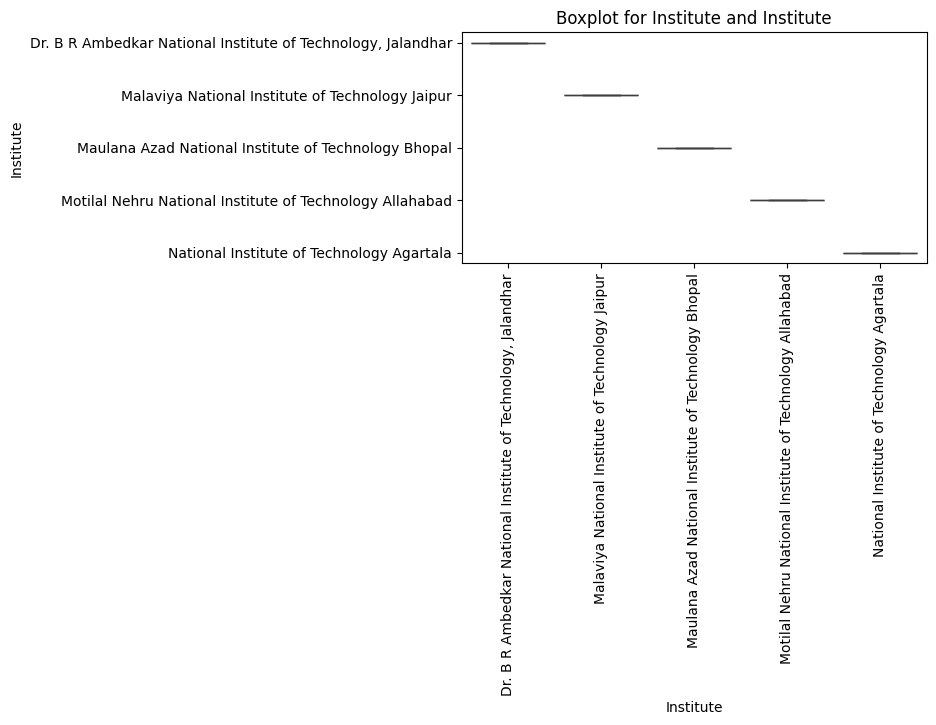

In [21]:
for col in cat:
    plot_box(df.head(1000), col, 'Institute')
    break

In [22]:
# 3. categorical vs categoric > Crosstab heatmap

def crosstab_heatmap(df: pd.DataFrame, cat_col1: str, cat_col2: str):
    ctab = pd.crosstab(df[cat_col1], df[cat_col2])
    sns.heatmap(ctab, annot=True, fmt="d")
    plt.title(f"Crosstab Heatmap for {cat_col1} vs {cat_col2}")
    plt.show()

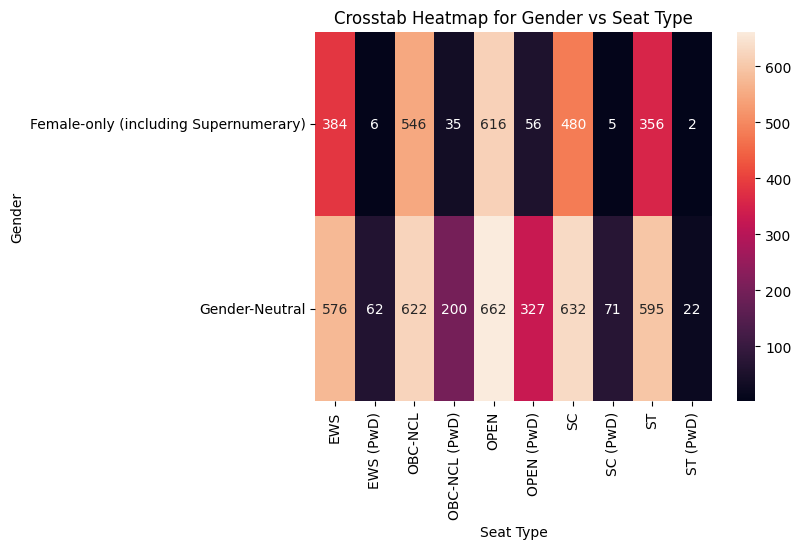

In [23]:
crosstab_heatmap(df, 'Gender', 'Seat Type')

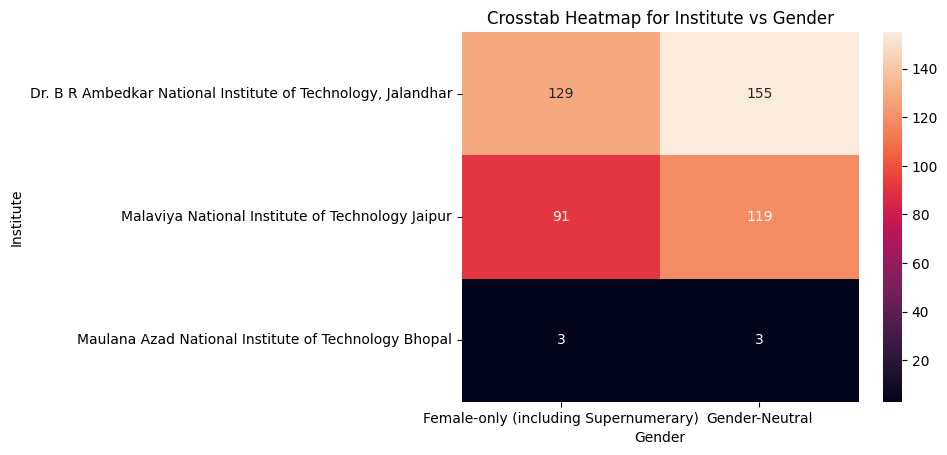

In [24]:
crosstab_heatmap(df.head(500), 'Institute', 'Gender',)

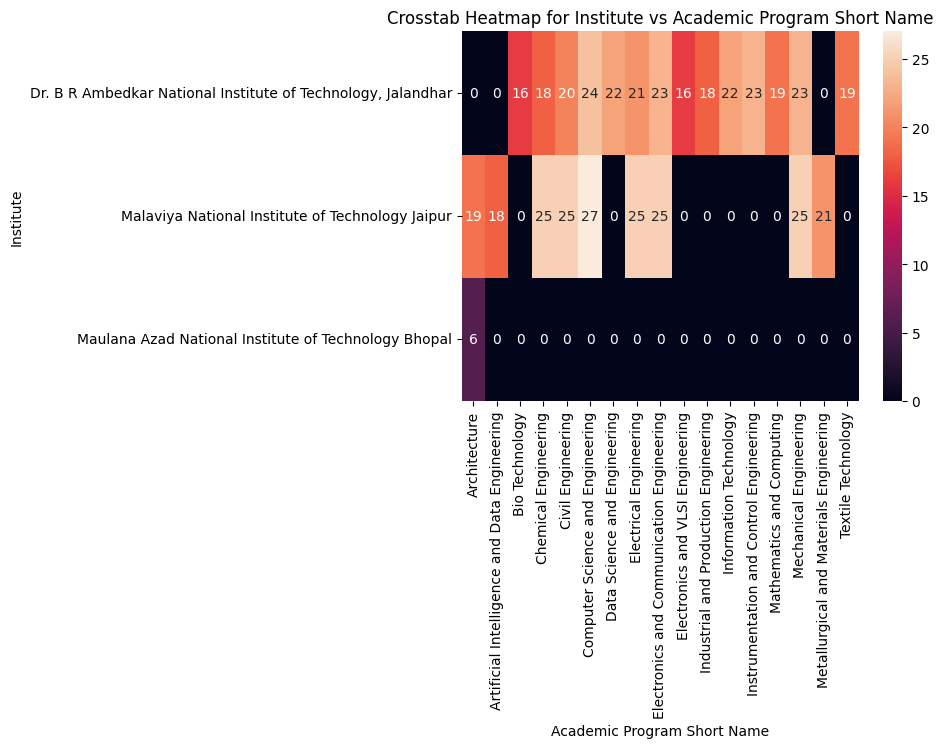

In [25]:
crosstab_heatmap(df.head(500), 'Institute', 'Academic Program Short Name',)

In [26]:
# Multivariate analysis
    # 1.correlation plot
    # 2.pairplot

corr = df.corr(numeric_only=True)
corr

,Opening Rank,Closing Rank
Opening Rank,1.000000,0.957513
Closing Rank,0.957513,1.000000


In [27]:
corr.loc["Opening Rank", "Closing Rank"]

np.float64(0.9575132578249941)

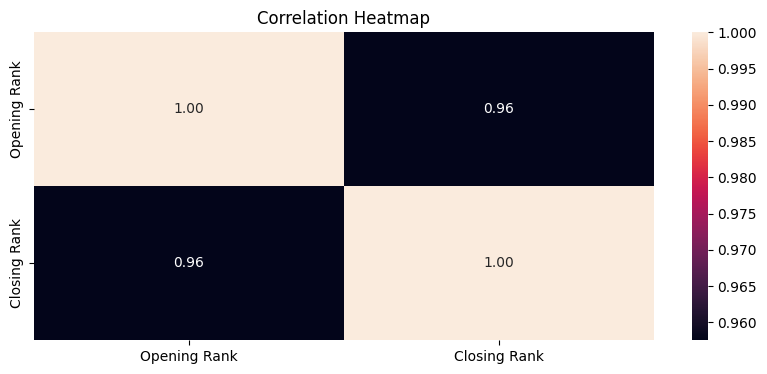

In [28]:
plt.figure(figsize=(10, 4))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

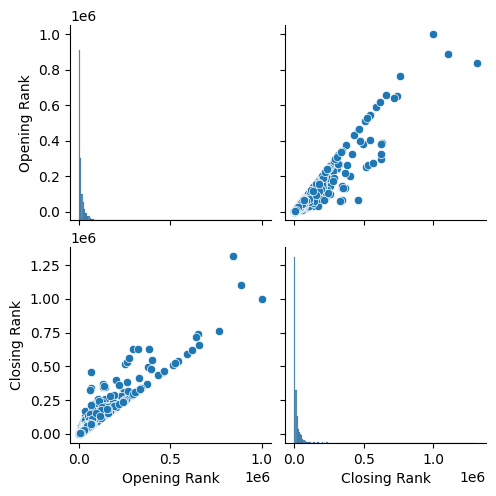

In [29]:
# Pair Plot
sns.pairplot(df[con])

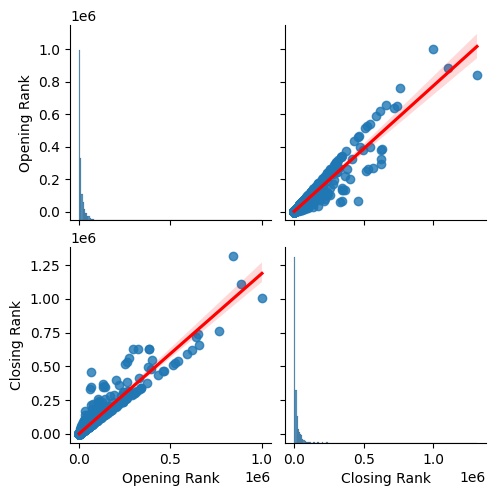

In [30]:
sns.pairplot(df[con], kind="reg", plot_kws = {"line_kws": {"color": "red"}})

##### `Questions`

##### Get Range of Ranks for 
    Quota: Open State(OS) and All India Category(AI) 
    Academic Program Name: All Engineering Branches
    Seat Type: OPEN
    Gender: Gender-Neutral

In [31]:
df = pd.read_csv('nit-colleges-open-close-ranks-2025.csv')
nit_ranks_for_general_category = (
    df.query('`Seat Type` == "OPEN" and `Gender` == "Gender-Neutral" and `Quota` in ["AI", "OS"] ')
)
nit_open_rank = int(nit_ranks_for_general_category['Opening Rank'].min())
nit_close_rank = int(nit_ranks_for_general_category['Closing Rank'].max())

print("NIT Colleges [ Min Opening Rank:", nit_open_rank, '| Max Closing Rank:', nit_close_rank,"]")

NIT Colleges [ Min Opening Rank: 2 | Max Closing Rank: 62338 ]


##### Get Range of Ranks for 
    Quota: Home State(HS) 
    Academic Program Name: All Engineering Branches
    Seat Type: OPEN
    Gender: Gender-Neutral

In [32]:
nit_ranks_for_home_state_general_category = (
    df.query('`Seat Type` == "OPEN" and `Gender` == "Gender-Neutral" and `Quota` in ["HS"] ')
)
open_rank_home_state = int(nit_ranks_for_home_state_general_category['Opening Rank'].min())
close_rank_home_state = int(nit_ranks_for_home_state_general_category['Closing Rank'].max())

print("NIT Colleges General Category [ Opening Rank:", open_rank_home_state, '| Closing Rank:', close_rank_home_state,"]")

NIT Colleges General Category [ Opening Rank: 93 | Closing Rank: 1314967 ]


##### `Get Range of Ranks for`
    Quota: Home State(HS) 
    Academic Program Name: All Engineering Branches
    Seat Type: SC
    Gender: Gender-Neutral

In [33]:
nit_ranks_for_home_state_sc_category = (
    df.query('`Seat Type` == "SC" and `Gender` == "Gender-Neutral" and `Quota` in ["HS"] ')
)
open_rank_home_state_sc = int(nit_ranks_for_home_state_sc_category['Opening Rank'].min())
close_rank_home_state_sc = int(nit_ranks_for_home_state_sc_category['Closing Rank'].max())

print("NIT Colleges SC Category: [ Opening Rank:", open_rank_home_state_sc, '| Closing Rank:', close_rank_home_state_sc,"]")

NIT Colleges SC Category: [ Opening Rank: 67 | Closing Rank: 122723 ]


##### `List Details of Lowest Opening Rank and Highest Closing Rank of Home State`

In [34]:
home_state_ranks = (
    df.query(' `Quota` == ["HS"] ')
)

lowest_rank_home_state = int(home_state_ranks['Opening Rank'].min())
highest_rank_home_state = int(home_state_ranks['Closing Rank'].max())

lowest_highest_ranks_home_state_details = (
    home_state_ranks.query('`Closing Rank` == @highest_rank_home_state or `Opening Rank` == @lowest_rank_home_state ')
)[[ "Academic Program Short Name", "Opening Rank", "Closing Rank"]]

print("NIT Colleges Lowest Opening Rank / Highest Closing Rank Home State Details:")
print(lowest_highest_ranks_home_state_details)

NIT Colleges Lowest Opening Rank / Highest Closing Rank Home State Details:
     Academic Program Short Name  Opening Rank  Closing Rank
4008      Mechanical Engineering        840727       1314967
5681                Architecture             3            46


##### `List Details of Lowest Opening Rank and Highest Closing Rank of Other States`

In [35]:
other_state_ranks = (
    df.query(' `Quota` == ["OS"] ')
)

lowest_rank_home_state = int(other_state_ranks['Opening Rank'].min())
highest_rank_home_state = int(other_state_ranks['Closing Rank'].max())

lowest_highest_ranks_home_state_details = (
    other_state_ranks.query('`Closing Rank` == @highest_rank_home_state or `Opening Rank` == @lowest_rank_home_state ')
)[[ "Academic Program Short Name", "Opening Rank", "Closing Rank"]]

print("NIT Colleges Lowest Opening Rank / Highest Closing Rank Other State Details:")
print(lowest_highest_ranks_home_state_details)

NIT Colleges Lowest Opening Rank / Highest Closing Rank Other State Details:
         Academic Program Short Name  Opening Rank  Closing Rank
1196                    Architecture             2           289
3283  Biosciences and Bioengineering         77083         77665


##### `List Details of`
    Lowest Opening Rank and Highest Closing Rank of Home State of SC Category

In [36]:
result = (
    df.query(' `Quota` == ["HS"] and `Seat Type` == "ST"')
)

lowest_rank_home_state = int(result['Opening Rank'].min())
highest_rank_home_state = int(result['Closing Rank'].max())

lowest_highest_ranks_home_state_sc_category = (
    result.query('`Closing Rank` == @highest_rank_home_state or `Opening Rank` == @lowest_rank_home_state ')
)[[ "Academic Program Short Name", "Opening Rank", "Closing Rank"]]

print("NIT Colleges Lowest Opening Rank / Highest Closing Rank ST category Home State Details:")
print(lowest_highest_ranks_home_state_sc_category)

NIT Colleges Lowest Opening Rank / Highest Closing Rank ST category Home State Details:
                      Academic Program Short Name  Opening Rank  Closing Rank
1113  Electronics and Instrumentation Engineering         18509         45138
2265             Computer Science and Engineering            44            44


In [40]:
grouped = df.groupby(['Seat Type', 'Quota']).agg(
    overall_min_rank=('Opening Rank', 'min'),
    overall_max_rank=('Closing Rank', 'max')
).reset_index()

print(grouped.head(3))

  Seat Type Quota  overall_min_rank  overall_max_rank
0       EWS    GO             29251             40634
1       EWS    HS               112            135703
2       EWS    JK              6236             76360


In [41]:
import pandas as pd

df = pd.read_csv('nit-colleges-open-close-ranks-2025.csv')
df['Opening Rank'] = pd.to_numeric(df['Opening Rank'], errors='coerce')
df['Closing Rank'] = pd.to_numeric(df['Closing Rank'], errors='coerce')

# Create a summary DataFrame
summary_rows = []

for (seat_type, quota), group in df.groupby(['Seat Type', 'Quota']):
    # Min opening rank info
    min_open_idx = group['Opening Rank'].idxmin()
    # Max opening rank info
    max_open_idx = group['Opening Rank'].idxmax()
    # Min closing rank info
    min_close_idx = group['Closing Rank'].idxmin()
    # Max closing rank info
    max_close_idx = group['Closing Rank'].idxmax()
    
    summary_rows.append({
        'Branch': group.loc[max_close_idx, 'Academic Program Short Name'][0:15],
        'Seat Type': seat_type,
        'Quota': quota,
        'Opening Rank': group['Opening Rank'].min(),
        'Closing Rank': group['Closing Rank'].max()
    })

summary_df = pd.DataFrame(summary_rows)
print(summary_df.head(3))


            Branch Seat Type Quota  Opening Rank  Closing Rank
0  Electronics and       EWS    GO         29251         40634
1  Mechanical Engi       EWS    HS           112        135703
2  Chemical Engine       EWS    JK          6236         76360
